In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor

In [3]:
rows = 10
cols = 2
#np.random.seed(0)

In [4]:
df = pd.DataFrame(np.random.randint(0, 100, (rows, cols)), columns=['x', 'y'])

In [5]:
df

,x,y
0,81,92
1,27,55
2,63,31
3,19,3
4,0,42
5,52,67
6,54,38
7,82,26
8,97,85
9,10,48


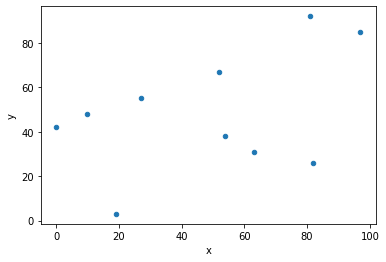

In [6]:
df.plot(x='x', y='y', kind='scatter')

y = m * x + b

In [7]:
m, b = 1, 1

In [8]:
df['y_pred'] = m * df['x'] + b

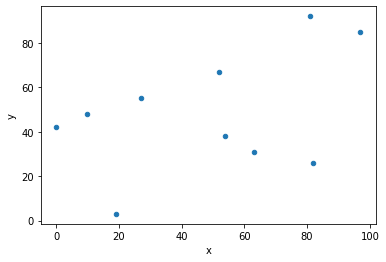

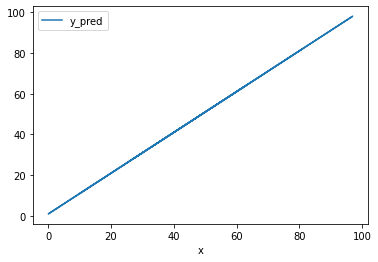

In [9]:
df.plot(x='x', y='y', kind='scatter')
df.plot(x='x', y='y_pred')

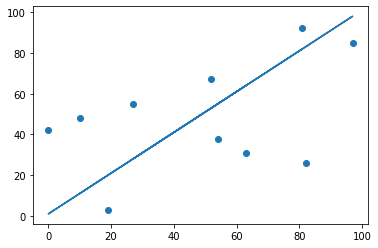

In [10]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [11]:
df['err_abs'] = np.abs(df['y'] - df['y_pred'])
df

,x,y,y_pred,err_abs
0,81,92,82,10
1,27,55,28,27
2,63,31,64,33
3,19,3,20,17
4,0,42,1,41
5,52,67,53,14
6,54,38,55,17
7,82,26,83,57
8,97,85,98,13
9,10,48,11,37


In [12]:
df['err_abs'].mean()

26.6

In [13]:
df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
df['m_change'].mean()

-14.5

In [14]:
df['b_chenge'] = np.sign(df['y'] - df['y_pred'])
df['b_chenge'].mean()

0.0

In [15]:
#learning rate
nu = 0.001

In [16]:
m = m + nu * df['m_change'].mean()
b = b + nu * df['b_chenge'].mean()

In [17]:
df['y_pred'] = m * df['x'] + b

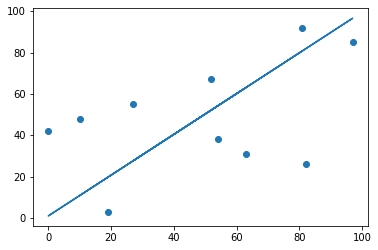

In [18]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [19]:
df['err_abs'] = np.abs(df['y'] - df['y_pred'])
df['err_abs'].mean()

26.38975

In [20]:
df = df[['x', 'y']].copy()

In [21]:
m, b = 1, 1
n = 20
df['y_pred'] = df['x'] * m + b
for i in range(n):
  df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
  df['b_chenge'] = np.sign(df['y'] - df['y_pred'])

  m = m + nu * df['m_change'].mean()
  b = b + nu * df['b_chenge'].mean()

  df['y_pred'] = df['x'] * m + b
  df['err_abs'] = np.abs(df['y'] - df['y_pred'])
  print(df['err_abs'].mean())

26.38975
26.1795
25.96925
25.759000000000004
25.548750000000005
25.338500000000003
25.12825
24.918000000000003
24.70775000000001
24.710499999999996
24.686449999999997
24.662399999999998
24.710650000000005
24.709399999999995
24.685349999999996
24.661299999999997
24.713550000000005
24.708299999999998
24.68425
24.6602


In [22]:
(m, b)

(0.8652000000000006, 1.0015999999999998)

II

https://stackoverflow.com/questions/49347878/normal-equation-for-linear-regression

In [23]:
df['x0'] = 1

In [24]:
XT = df[['x', 'x0']].T

In [25]:
XTX = XT@df[['x', 'x0']]

In [26]:
inv = np.linalg.pinv(XTX)

In [27]:
theta = (inv@XT)@df['y']
print(theta)

0     0.373901
1    30.565811
dtype: float64


In [28]:
m, b

(0.8652000000000006, 1.0015999999999998)

sklearn

In [29]:
model = LinearRegression()

In [30]:
model.fit(df[['x']], df['y'])

LinearRegression()

In [31]:
model.coef_, model.intercept_

(array([0.37390081]), 30.565810763278243)

In [37]:
df['pred'] = model.predict(df[['x']])

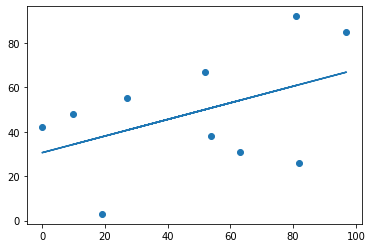

In [38]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred'])